<a href="https://colab.research.google.com/github/NicoSammur/prediccion-stock-chile-ml/blob/main/Predict_COPEC_SN_with_SVR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Predict COPEC.SN using support vector regression for an specific day
# nicolas _@_ ipv4.cl

In [62]:
# Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [14]:
#Load data
from google.colab import files
files.upload()

Saving COPEC.SN.csv to COPEC.SN.csv


{'COPEC.SN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-01-02,7039.700195,7125.000000,6950.000000,7003.100098,6632.645996,292522\n2014-01-03,7003.100098,7100.000000,6950.000000,7010.500000,6639.653809,466358\n2014-01-06,7080.600098,7080.600098,6920.100098,7013.399902,6642.400391,505436\n2014-01-07,7013.399902,7045.000000,6902.000000,6984.299805,6614.840332,328775\n2014-01-08,6984.299805,7040.000000,6970.000000,7031.799805,6659.828125,440840\n2014-01-09,7031.799805,7050.000000,6920.000000,6942.299805,6575.062500,349560\n2014-01-10,6942.299805,6978.899902,6850.000000,6910.000000,6544.470703,233979\n2014-01-13,6948.000000,6948.000000,6850.000000,6902.500000,6537.368164,438849\n2014-01-14,6902.500000,7000.000000,6870.000000,6972.000000,6603.191406,344101\n2014-01-15,6972.000000,7019.899902,6970.000000,6980.200195,6610.957031,356799\n2014-01-16,6980.200195,7050.000000,6870.000000,7000.100098,6629.804688,336605\n2014-01-17,6990.000000,7039.799805,6950.000000,7001.899902,6631.50878

In [34]:
# Store data
df = pd.read_csv('COPEC.SN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,7039.700195,7125.000000,6950.000000,7003.100098,6632.645996,292522
1,2014-01-03,7003.100098,7100.000000,6950.000000,7010.500000,6639.653809,466358
2,2014-01-06,7080.600098,7080.600098,6920.100098,7013.399902,6642.400391,505436
3,2014-01-07,7013.399902,7045.000000,6902.000000,6984.299805,6614.840332,328775
4,2014-01-08,6984.299805,7040.000000,6970.000000,7031.799805,6659.828125,440840
...,...,...,...,...,...,...,...
1748,2021-01-11,7911.000000,8034.899902,7888.000000,7911.000000,7911.000000,118343
1749,2021-01-12,7999.000000,8000.000000,7849.899902,7999.000000,7999.000000,60714
1750,2021-01-13,8090.000000,8240.000000,7850.100098,8090.000000,8090.000000,375100
1751,2021-01-14,8120.000000,8140.000000,7970.000000,8120.000000,8120.000000,61527


In [35]:
# Rows 
df.shape 

(1753, 7)

In [36]:
# Print the last row of data to confirm how the model adapts later 
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1752,2021-01-15,8119.0,8200.0,8038.799805,8119.0,8119.0,39990


In [37]:
# Prepare data for training the 3 different models
# Get all data except last row to compare
df = df.head(len(df)-1)
print(df)

            Date         Open         High  ...        Close    Adj Close  Volume
0     2014-01-02  7039.700195  7125.000000  ...  7003.100098  6632.645996  292522
1     2014-01-03  7003.100098  7100.000000  ...  7010.500000  6639.653809  466358
2     2014-01-06  7080.600098  7080.600098  ...  7013.399902  6642.400391  505436
3     2014-01-07  7013.399902  7045.000000  ...  6984.299805  6614.840332  328775
4     2014-01-08  6984.299805  7040.000000  ...  7031.799805  6659.828125  440840
...          ...          ...          ...  ...          ...          ...     ...
1747  2021-01-08  8000.000000  8064.000000  ...  8000.000000  8000.000000  168914
1748  2021-01-11  7911.000000  8034.899902  ...  7911.000000  7911.000000  118343
1749  2021-01-12  7999.000000  8000.000000  ...  7999.000000  7999.000000   60714
1750  2021-01-13  8090.000000  8240.000000  ...  8090.000000  8090.000000  375100
1751  2021-01-14  8120.000000  8140.000000  ...  8120.000000  8120.000000   61527

[1752 rows x 7 

In [38]:
# Create empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [42]:
# Get the dates and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [47]:
# Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[1])])
# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price) )


In [48]:
# Print the days and the adj close prices
print(days)
print(adj_close_prices)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10]

In [69]:
# Create and train 3 SVR models

# Create and train SVR using a lineal kernel
lin_svr = SVR(kernel='linear', C=1.0)
lin_svr.fit(days, adj_close_prices)

# Create and train SVR using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create and train SVR using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

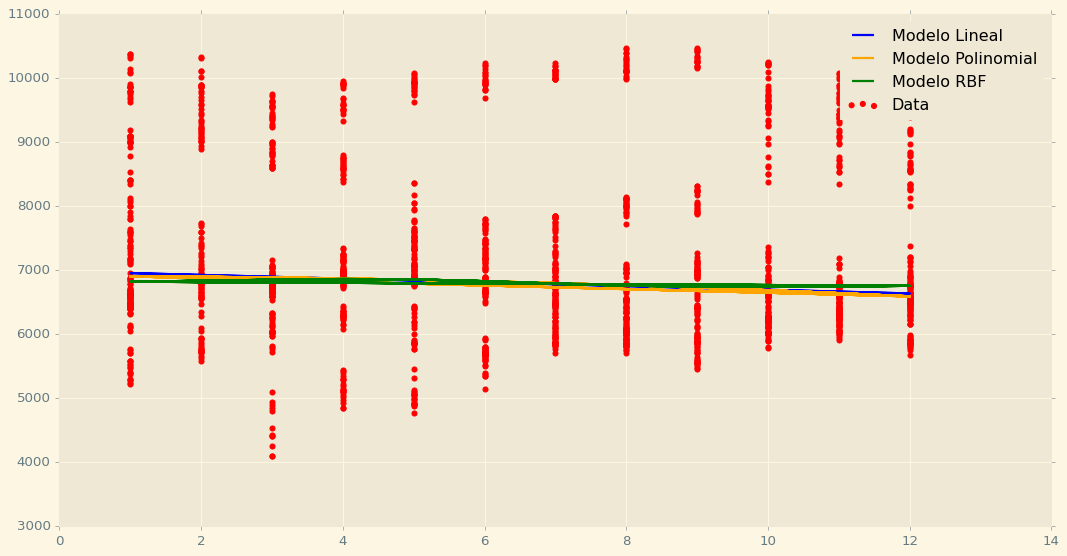

In [70]:
# Plot model to see which has the best fit on original df COPEC.SN 
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Modelo Lineal')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Modelo Polinomial')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'Modelo RBF')
plt.legend()
plt.show()

In [71]:
# Show predicted file (to confirm last date)
day = [[31]]
print('Linear SVR predicted: ', lin_svr.predict(day))
print('Polynomial SVR predicted: ', poly_svr.predict(day))
print('RBF SVR predicted: ', rbf_svr.predict(day))

Linear SVR predicted:  [6085.2982828]
Polynomial SVR predicted:  [4806.17432786]
RBF SVR predicted:  [6795.43468744]


In [72]:
# Print the actual price of the stock on day 31
print('Actual COPEC.SN is: ', actual_price['Adj Close'][1752])

Actual COPEC.SN is:  8119.0
